Estimated number of clusters: 2
Estimated number of noise points: 4
Homogeneity: 0.567
Completeness: 0.837
V-measure: 0.676
Adjusted Rand Index: 0.550
Adjusted Mutual Information: 0.670
Silhouette Coefficient: 0.539


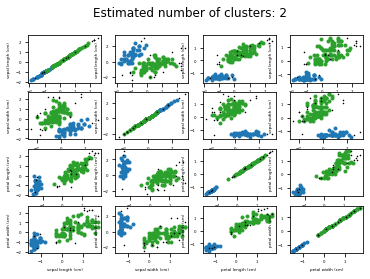

In [1]:
# based on https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
import itertools

import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# #############################################################################
iris = load_iris()
X = iris.data
target = iris.target
feature_names = iris.feature_names

n_dim = X.shape[1]

# scale the data
X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=1, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(target, labels))
print("Completeness: %0.3f" % metrics.completeness_score(target, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(target, labels))
print("Adjusted Rand Index: %0.3f"
	  % metrics.adjusted_rand_score(target, labels))
print("Adjusted Mutual Information: %0.3f"
	  % metrics.adjusted_mutual_info_score(target, labels))
print("Silhouette Coefficient: %0.3f"
	  % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
		  for each in np.linspace(0, 1, len(unique_labels))]
fig, ax = plt.subplots(n_dim, n_dim)

l_dim=np.arange(0,n_dim)
views = list(itertools.product(l_dim,l_dim))

for view in views:
	for k, col in zip(unique_labels, colors):
		if k == -1:
			# Black used for noise.
			col = [0, 0, 0, 1]

		class_member_mask = (labels == k)

		xy = X[class_member_mask & core_samples_mask]
		# plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
		# 		 markeredgecolor='k', markersize=14)
		ax[view[0], view[1]].plot(xy[:, view[0]], xy[:, view[1]], 'o', markersize=3)

		xy = X[class_member_mask & ~core_samples_mask]
		ax[view[0], view[1]].plot(xy[:, view[0]], xy[:, view[1]], '*', markerfacecolor=tuple(col),
				markeredgecolor='k', markersize=1)


	ax[view[0], view[1]].set_ylabel(feature_names[view[0]], fontsize=4)
	ax[view[0], view[1]].set_xlabel(feature_names[view[1]], fontsize=4)
	ax[view[0], view[1]].tick_params(axis="both", labelsize=4)

plt.suptitle('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()
fig.savefig('dbscan.jpeg', dpi=600 )
